# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
df = pd.read_csv('../data/checker_regression.csv')
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          29 non-null     object 
 1   num_commits  29 non-null     int64  
 2   pageviews    29 non-null     float64
 3   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
X = df[['num_commits', 'pageviews']]
y = df['AVG(diff)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [4]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, random_state=21, shuffle=True)
    rmses = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        rmses.append((rmse_train, rmse_test))

        print(f"train -  {rmse_train:.4f}   |   test -  {rmse_test:.4f}")

    average_rmse = np.mean([rmse[1] for rmse in rmses])
    print(f"Average RMSE on crossval is {average_rmse:.4f}")

In [5]:
print("Linear Regression:")
crossval(10, X_train, y_train, LinearRegression())

Linear Regression:
train -  52.0981   |   test -  70.7392
train -  56.0401   |   test -  42.8441
train -  53.4592   |   test -  61.0639
train -  53.1766   |   test -  68.7174
train -  55.6038   |   test -  41.9949
train -  53.5434   |   test -  66.5262
train -  55.2088   |   test -  47.1899
train -  51.0824   |   test -  96.1640
train -  53.0934   |   test -  69.7548
train -  56.8172   |   test -  12.0949
Average RMSE on crossval is 57.7089


In [6]:
print("Decision Tree Regressor:")
crossval(10, X_train, y_train, DecisionTreeRegressor(random_state=21))

Decision Tree Regressor:
train -  0.0000   |   test -  72.1381
train -  0.0000   |   test -  56.5033
train -  0.0000   |   test -  60.9139
train -  0.0000   |   test -  77.0039
train -  0.0000   |   test -  77.4830
train -  0.0000   |   test -  57.9828
train -  0.0000   |   test -  43.7058
train -  0.0000   |   test -  0.0000
train -  0.0000   |   test -  64.7793
train -  0.0000   |   test -  87.1627
Average RMSE on crossval is 59.7673


In [7]:
print("Random Forest Regressor:")
crossval(10, X_train, y_train, RandomForestRegressor(random_state=21))

Random Forest Regressor:
train -  17.9404   |   test -  60.8410
train -  23.0379   |   test -  36.0357
train -  22.3691   |   test -  65.2599
train -  21.1182   |   test -  62.7925
train -  20.2734   |   test -  64.3505
train -  21.6217   |   test -  60.6839
train -  21.9597   |   test -  39.3164
train -  22.7913   |   test -  47.6693
train -  23.4133   |   test -  58.2002
train -  24.2103   |   test -  53.2999
Average RMSE on crossval is 54.8449


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [8]:
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Actual vs. Predicted')
    plt.scatter(y_true, y_true, alpha=0.5, label='Ideal Prediction')
    plt.plot(np.sort(y_true), np.sort(y_true), color='orange', linestyle='--')
    plt.title(f"{model_name} - Actual vs. Predicted")
    plt.xlabel("Actual Average Difference")
    plt.ylabel("Predicted Average Difference")
    plt.legend()
    plt.show()



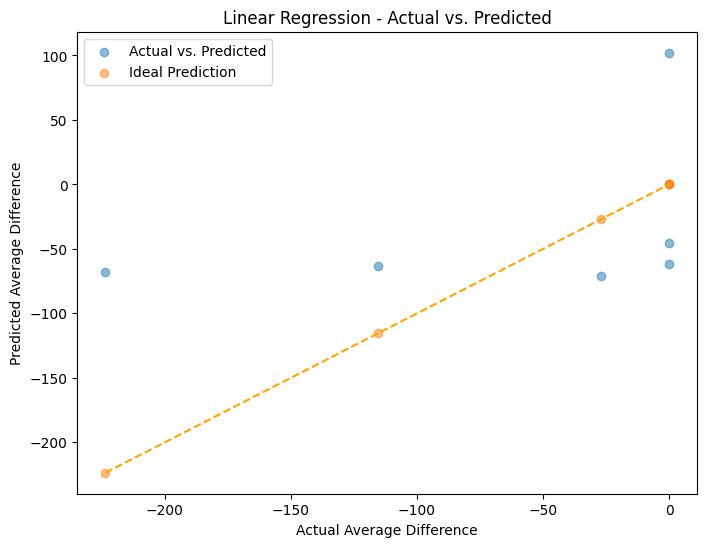

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_predictions(y_test, y_pred, "Linear Regression")

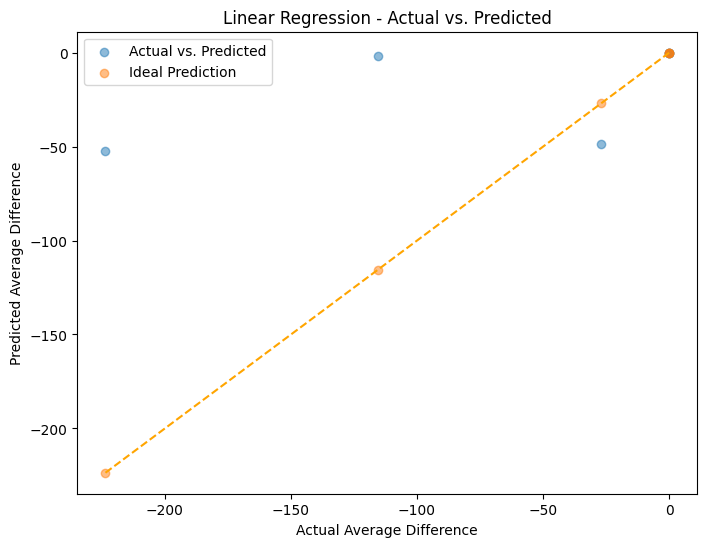

In [10]:
model = DecisionTreeRegressor(random_state=21)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_predictions(y_test, y_pred, "Linear Regression")

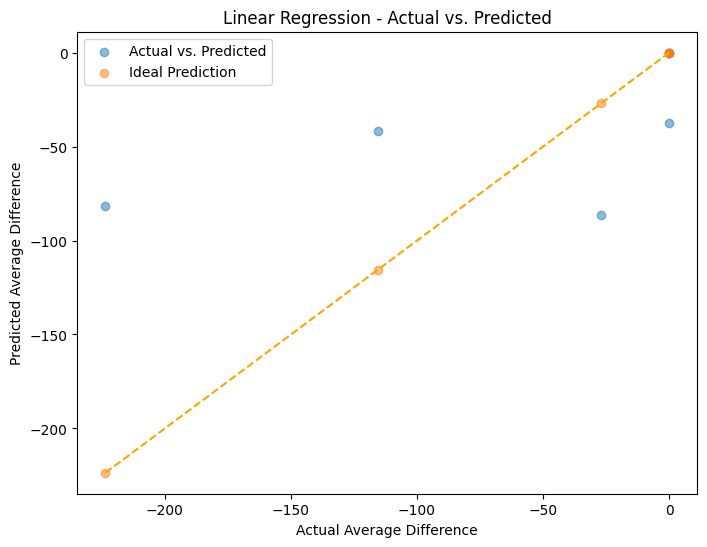

In [11]:
model = RandomForestRegressor(random_state=21)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_predictions(y_test, y_pred, "Linear Regression")

## In the ideal case, the plot would show a perfect linear relationship between the actual and predicted values, with all points lying on the diagonal line (y=x). This would indicate that the model's predictions are exactly equal to the actual values.